<b>AML2019</b>

## Useful articles

- [Dealing with categorical features](https://medium.com/hugo-ferreiras-blog/dealing-with-categorical-features-in-machine-learning-1bb70f07262d)

- ['statsmodels' library](https://www.statsmodels.org/stable/index.html)

- [some potentially useful packages](https://medium.com/activewizards-machine-learning-company/top-15-python-libraries-for-data-science-in-in-2017-ab61b4f9b4a7)

- [other pot. useful packages](https://www.kdnuggets.com/2018/06/top-20-python-libraries-data-science-2018.html/2)

- ['seaborn' library (visualization)](https://seaborn.pydata.org/tutorial.html)

- [Nyttig eksempel](https://becominghuman.ai/linear-regression-in-python-with-pandas-scikit-learn-72574a2ec1a5)

## Declaring libraries and importing data

In [1]:
%matplotlib inline
# For configuration and jupiter
import os
import sys
import re
import random
import matplotlib
import implicit
# For data manipulation
import pandas as pd
import numpy as np
# For visualization
import matplotlib.pyplot as plt
import seaborn as sns
# For performance evaluation
from time import time

os.environ["OPENBLAS_NUM_THREADS"] = "1"   # Required by implicit
base = "/mnt/workspace/AML-2019/Challenges/House_Pricing/challenge_data/"

pricesRawDF = pd.read_csv(base + 'train.csv', keep_default_na = False)
#pricesRawDF['Alley'] = pricesRawDF['Alley'].astype(str, errors='ignore')
pricesRawDF[20:25]

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
20,21,60,RL,101,14215,Pave,NA,IR1,Lvl,AllPub,...,0,NA,NA,NA,0,11,2006,New,Partial,325300
21,22,45,RM,57,7449,Pave,Grvl,Reg,Bnk,AllPub,...,0,NA,GdPrv,NA,0,6,2007,WD,Normal,139400
22,23,20,RL,75,9742,Pave,NA,Reg,Lvl,AllPub,...,0,NA,NA,NA,0,9,2008,WD,Normal,230000
23,24,120,RM,44,4224,Pave,NA,Reg,Lvl,AllPub,...,0,NA,NA,NA,0,6,2007,WD,Normal,129900
24,25,20,RL,NA,8246,Pave,NA,IR1,Lvl,AllPub,...,0,NA,MnPrv,NA,0,5,2010,WD,Normal,154000


## Data cleaning

In [2]:
# To check if number of unique elements in coloumn exceeds number of types in data description
# Only useful for columns with categorical data 
nr_column_categories = []

for column in pricesRawDF:
    nr_column_categories.append((column, pricesRawDF[column].nunique()))

for elements in nr_column_categories[:10]:
    print(elements)

('Id', 1200)
('MSSubClass', 15)
('MSZoning', 5)
('LotFrontage', 107)
('LotArea', 913)
('Street', 2)
('Alley', 3)
('LotShape', 4)
('LandContour', 4)
('Utilities', 2)


What is worth noting here is that in some of the columns containing categorical data, not all the different categories are represented. For example the an element of the column "MSSubClass" can take 16 unique values based upon the its description in "Data Description.rtf". This means that transforming the values in categorical columns to numerical values, or one-hot-encoding will be a bit cumbersome. 

In [3]:
# To check if there are any elements missing in a certain column
pricesRawDF.isnull().values.any()
# True if keep_default_na = True
# False if keep_default_na = False

False

In [5]:
# Trying to plot histograms of individual data columns to find the distribution of 
# of data with respect to specific coloumns. Such that we possibly can eliminate outliers 
pricesRaw1_5DF = pricesRawDF.iloc[:,1:3]
pricesRaw1_5DF[:5]

#plt.tight_layout


,MSSubClass,MSZoning
0,60,RL
1,20,RL
2,60,RL
3,70,RL
4,60,RL


In [21]:
# Transforming the categories we want to be numeric, to numeric values
from sklearn.preprocessing import LabelEncoder
from variables import * # cats_split and cats_num

categorical_to_make_numerical = ['Street', 'LotShape', 'LandContour', 'LandSlope', 'CentralAir',
                                'ExterQual', 'ExterCond', 'BsmtQual', 'BsmtCond', 'BsmtExposure',
                                'BsmtFinType1', 'BsmtFinType2', 'HeatingQC', 'KitchenQual',
                                'Functional', 'FireplaceQu', 'GarageFinish', 'GarageQual', 'GarageCond',
                                'PoolQC', 'Fence']

# First we transform all the categories in the coloumns we want to make numerical
numDF = pricesRawDF.copy()
for category in cats_num:
    # Fetching column name
    col_name = category['name']
    # Fetching column
    coloumn_to_numerize = numDF[col_name]
    # DEtte er en endring
    


'for col_name in categorical_to_make_numerical:\n    col = pricesNumericalDF[col_name]\n    pricesNumericalDF[col_name] = LabelEncoder().fit_transform(col)'

In [9]:
from variables import * # cats_split
# One-hot-encoding the categories we want to split
categorical_to_split = ['MSSubClass', 'MSZoning', 'Alley', 'LotConfig', 'Utilities',
                       'Neighborhood', 'Condition1', 'Condition2', 'BldgType', 'HouseStyle',
                       'RoofStyle', 'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType',
                       'Foundation', 'Heating', 'Electrical', 'GarageType', 'PavedDrive', 
                       'MiscFeature', 'SaleType', 'SaleCondition']

# Casting the type of all columns we want to one-hot-key to strings
for cat in categorical_to_split:
    pricesRawDF[cat] = pricesRawDF[cat].astype(str, errors = 'ignore')
    
#pricesRawDF.dtypes

# Test function for one-hot-encoding given the possible categories of each column
colu_name = 'MSSubClass'
cat = ['20','30','40','45','50','60','70','75','80','85', '90', '120', '150', '160', '180', '190']

def split_and_filter(col_name, DF, categories):
    # Extracting column to split
    column_to_split = DF[col_name].copy()
    # Setting new names for columns
    new_col_names = [(col_name + '_' + category) for category in categories]
    # Creating expanded DF of zeros
    splitDF = pd.DataFrame(np.zeros([column_to_split.size,len(categories)], dtype = np.int8), columns = categories)
    # Looping through series and setting correct values in new DF
    for ind, val in column_to_split.iteritems():
        # Checking if the value is valid, i.e exists in the set of possible categories for one column
        if (val in categories):
            splitDF.at[ind, val] = 1

    # Renaming columns of new dataframe
    splitDF.columns = new_col_names
    '''# Following two lines used for debugging
    newColDF = pd.merge(col.to_frame(), splitDF, left_index=True, right_index=True)
    print(newColDF[:5])'''
    # Merging expansion of one column with full DataFrame
    newDF = pd.merge(DF, splitDF, left_index=True, right_index=True)
    # Dropping original column
    newDF.drop([col_name], axis=1, inplace=True)
    # Deleting unused dataframe and series to conserve memory
    del splitDF
    del column_to_split
    return newDF

def category_splitting(rawDF, list_of_categories):
    newDF = split_and_filter(list_of_categories[0][0], rawDF, list_of_categories[0][1:])
    for column_to_split in list_of_categories[1:]:
        newDF = split_and_filter(column_to_split[0], newDF, column_to_split[1:])
    return newDF

categorizedDF = category_splitting(pricesRawDF, cats_split)
print(categorizedDF.columns)


Index(['Id', 'LotFrontage', 'LotArea', 'Street', 'LotShape', 'LandContour',
       'LandSlope', 'OverallQual', 'OverallCond', 'YearBuilt',
       ...
       'SaleType_ConLw', 'SaleType_ConLI', 'SaleType_ConLD', 'SaleType_Oth',
       'SaleCondition_Normal', 'SaleCondition_Abnorml',
       'SaleCondition_AdjLand', 'SaleCondition_Alloca', 'SaleCondition_Family',
       'SaleCondition_Partial'],
      dtype='object', length=252)


## Playing around with seaborn

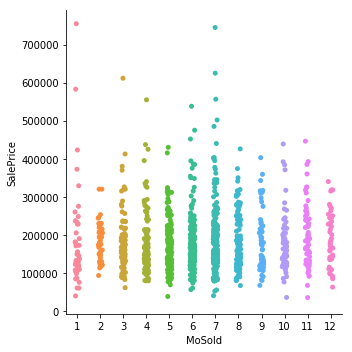

In [9]:
sns.catplot(x="MoSold", y="SalePrice", data=pricesRawDF);

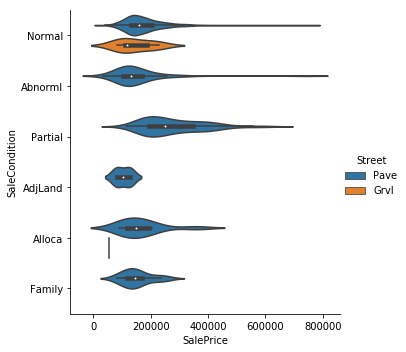

In [11]:
sns.catplot(x="SalePrice", y="SaleCondition", hue="Street",
            kind="violin", data=pricesRawDF);